# Classifier for Political Ideology using GSS Data

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.neural_network import MLPClassifier

In [17]:

# Political Ideology Classifier Using GSS Data


## Step 2: Load Data
df = pd.read_excel("result-3/GSS.xlsx", sheet_name="Data")

## Step 3: Filter Valid Rows
# Keep only rows where all required values are present
df = df[['year', 'polviews', 'grass', 'abany', 'intenvir']]
df = df.dropna()
df = df[~df.apply(lambda row: row.astype(str).str.contains(":").any(), axis=1)]

## Step 4: Encode Categorical Variables
# Simplify polviews to 3 categories
def simplify_polviews(val):
    if "liberal" in val.lower():
        return "liberal"
    elif "conservative" in val.lower():
        return "conservative"
    elif "moderate" in val.lower():
        return "moderate"
    else:
        return None

df['polviews_simplified'] = df['polviews'].apply(simplify_polviews)
df = df[df['polviews_simplified'].notnull()]
df = df[df['polviews_simplified'] != 'moderate']



# Step 5: Select relevant columns for encoding
selected_cols = ['grass', 'abany', 'intenvir']
df_subset = df[['polviews_simplified'] + selected_cols].copy()


interest_map = {
    "Not at all interested": 0,
    "Moderately interested": 1,
    "Very interested": 2
}

legal_map = {
    "Should be legal" : 1,
    "Should not be legal" : 0
    
}

df['intenvir'] = df['intenvir'].map(interest_map)
df['grass'] = df['grass'].map(legal_map)

df['abany'] = df['abany'].map({"NO": 0, "YES": 1})

df['intenvir_abany'] = df['intenvir'] * df['abany']
df['intenvir_grass'] = df['intenvir'] * df['grass']
df['abany_grass'] = df['abany'] * df['grass']


df.drop(columns=['year', 'polviews'], inplace=True)


# Now df_encoded is ready for modeling
X = df.drop(columns=['polviews_simplified'])
y = df['polviews_simplified']


## Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)

Best parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}


In [20]:

#label_encoder = LabelEncoder()
#y_encoded = label_encoder.fit_transform(y)


## Step 7: Train Classifier
model = RandomForestClassifier(
    n_estimators=200,       # Number of trees
    max_depth=3,         # Let trees grow fully
    random_state=42,
    min_samples_split=2,
    class_weight='balanced')

model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=200,
                       random_state=42)

Mean accuracy: 0.7059196617336152
Accuracy: 0.7272727272727273

Classification Report:
               precision    recall  f1-score   support

conservative       0.77      0.77      0.77        26
     liberal       0.67      0.67      0.67        18

    accuracy                           0.73        44
   macro avg       0.72      0.72      0.72        44
weighted avg       0.73      0.73      0.73        44



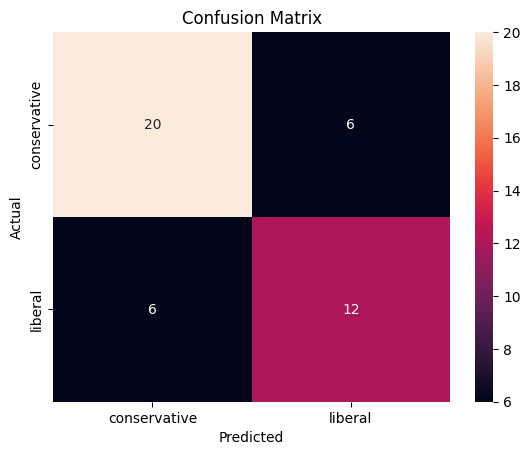

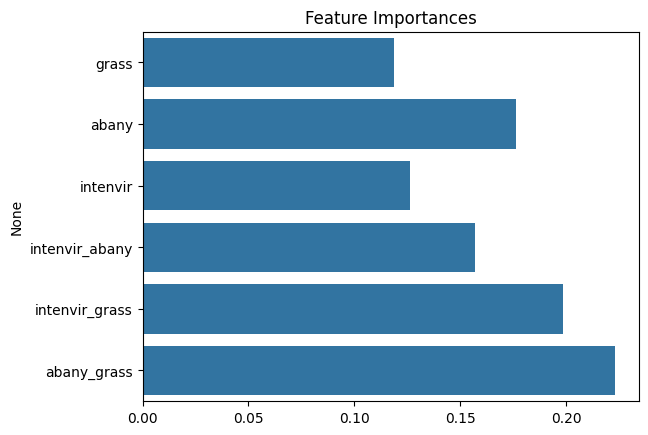

In [21]:
## Step 8: Evaluate
y_pred = model.predict(X_test)

scores = cross_val_score(model, X, y, cv=5)
print("Mean accuracy:", scores.mean())

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

## Step 9: Visualize
sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


importances = model.feature_importances_
feat_names = X.columns
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importances")
plt.show()


In [93]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/5a/0b/f9f815f240a9610d42367172b9f7ef7e8c9113a09b1bb35d4d85f96b910a/xgboost-3.0.0-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: /Library/Frameworks/Python.framework/Versions/3.12/bin/python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
